In [100]:
import ipy_table
from collections import Counter
from IPython.display import HTML, display
import tabulate
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
import warnings
import pandas as pd

# plotly
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly

#matplotlib
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%run ../aux/postgres.py

postgres functions loaded...


In [3]:
query("select * from projeto order by codprojeto desc")

[(37, 'Coronavirus', None, None),
 (36, 'Eleições 2018 (api)', None, None),
 (35, 'Eleições 2018 (users)', 'Coletados via TweetScrapy', None),
 (34, 'Eleições 2018 (tweets)', 'Coletados via TweetScrapy', None),
 (33, 'Desenvolvimento Infantil', None, None),
 (32, 'Dental Health', None, None),
 (31, 'Análise Microcefalia', None, None),
 (30, 'Dengue', None, None),
 (29, 'Vacinação Gripe 2014', None, None),
 (28, 'Análise de Disseminação', None, None),
 (27, 'ABSA: SMARTPHONES', None, None),
 (26, 'IMPEACHMENT', None, None),
 (25, 'TERRORISMO PARIS', None, None),
 (24, 'Biomaterial', None, None),
 (23, 'Terrorismo', None, None),
 (22, 'STARBUCKS', 'Coleta mundial', None),
 (21, 'RP', None, None),
 (20, 'Doação de Sangue', None, None),
 (19, 'LB2W', None, None),
 (18, 'FUVEST', None, None),
 (17,
  'TWITTER SAUDE',
  'Termos monitorados: gripe, vacina, vacinação, febre, dor, alergia, dengue, chikungunya, diarreia, aids, hiv e doação de sangue',
  None),
 (16, 'SAUDE - UPMCP', None, None),

In [5]:
query("select local1, local2, local3 from tweet where codprojeto = 37 limit 5")

[('', '', ''),
 ('', '', ''),
 ('Portugal', 'Lisboa', 'Lisboa, Portugal'),
 ('', '', ''),
 ('', '', '')]

In [108]:
query("select count(*) from tweet where codprojeto = 37")

[(23757690,)]

In [ ]:
query("select count(*) from tweet where codprojeto = 37 and json->>'lang' = 'pt'")

[(11654460,)]

In [ ]:
query("select count(*) from tweet where codprojeto = 37 and json->>'lang' = 'fr'")

[(12103230,)]

In [ ]:
query("select local1, count(*) from tweet where codprojeto = 37 and json->>'lang' = 'pt' group by 1 order by 2 desc")

In [107]:
query("select lower(json->'user'->>'location') as user_location, count(*) from tweet where codprojeto = 37 and json->>'lang' = 'pt' group by 1 order by 2 desc")

[(None, 3704618),
 ('brasil', 511315),
 ('rio de janeiro, brasil', 362720),
 ('são paulo, brasil', 338249),
 ('rio de janeiro', 124393),
 ('brazil', 123390),
 ('são paulo', 101859),
 ('brasília, brasil', 99181),
 ('belo horizonte, brasil', 85817),
 ('recife, brasil', 56236),
 ('curitiba, brasil', 55835),
 ('porto alegre, brasil', 51104),
 ('fortaleza, brasil', 41891),
 ('minas gerais, brasil', 41806),
 ('manaus, brasil', 41406),
 ('portugal', 40704),
 ('salvador, brasil', 38972),
 ('sao paulo, brazil', 37175),
 ('goiânia, brasil', 36547),
 ('rio grande do sul, brasil', 33476),
 ('belém, brasil', 33475),
 ('rj', 31234),
 ('são luís, brasil', 29905),
 ('santa catarina, brasil', 28386),
 ('florianópolis, brasil', 28165),
 ('lisboa, portugal', 27031),
 ('porto, portugal', 25609),
 ('belo horizonte', 23792),
 ('rio de janeiro, brazil', 23495),
 ('recife', 22284),
 ('espírito santo, brasil', 21267),
 ('brasília', 20985),
 ('021', 20271),
 ('porto alegre', 20148),
 ('campinas, brasil', 20039)

In [8]:
query("select * from tweet where codprojeto = 37 limit 10")

[(297169151,
  '1236021749927620608',
  'RT @ClaudiaCostin: Brasil tem 13 casos confirmados do novo coronavírus, diz Ministério da Saúde\nhttps://t.co/aDPq2Rivcp',
  '109074316',
  None,
  '',
  '',
  '',
  '',
  datetime.date(2020, 3, 6),
  datetime.time(20, 12, 4),
  None,
  37,
  {'quote_count': 0,
   'contributors': None,
   'truncated': False,
   'text': 'RT @ClaudiaCostin: Brasil tem 13 casos confirmados do novo coronavírus, diz Ministério da Saúde\nhttps://t.co/aDPq2Rivcp',
   'is_quote_status': False,
   'in_reply_to_status_id': None,
   'reply_count': 0,
   'id': 1236021749927620608,
   'favorite_count': 0,
   'entities': {'user_mentions': [{'id': 53772716,
      'indices': [3, 17],
      'id_str': '53772716',
      'screen_name': 'ClaudiaCostin',
      'name': 'Claudia Costin'}],
    'symbols': [],
    'hashtags': [],
    'urls': [{'url': 'https://t.co/aDPq2Rivcp',
      'indices': [96, 119],
      'expanded_url': 'https://oglobo.globo.com/sociedade/coronavirus/brasil-tem-13-

In [10]:
query("select json from tweet where codprojeto = 37 limit 1")

[({'quote_count': 0,
   'contributors': None,
   'truncated': False,
   'text': 'RT @ClaudiaCostin: Brasil tem 13 casos confirmados do novo coronavírus, diz Ministério da Saúde\nhttps://t.co/aDPq2Rivcp',
   'is_quote_status': False,
   'in_reply_to_status_id': None,
   'reply_count': 0,
   'id': 1236021749927620608,
   'favorite_count': 0,
   'entities': {'user_mentions': [{'id': 53772716,
      'indices': [3, 17],
      'id_str': '53772716',
      'screen_name': 'ClaudiaCostin',
      'name': 'Claudia Costin'}],
    'symbols': [],
    'hashtags': [],
    'urls': [{'url': 'https://t.co/aDPq2Rivcp',
      'indices': [96, 119],
      'expanded_url': 'https://oglobo.globo.com/sociedade/coronavirus/brasil-tem-13-casos-confirmados-do-novo-coronavirus-diz-ministerio-da-saude-1-24290456?utm_source=aplicativoOGlobo&utm_medium=aplicativo&utm_campaign=compartilhar',
      'display_url': 'oglobo.globo.com/sociedade/coro…'}]},
   'retweeted': False,
   'coordinates': None,
   'timestamp_ms': '1583

In [ ]:
query("select json->'user'->'location' from tweet where codprojeto = 37 limit 1")

In [38]:
query("select lower(json->'user'->>'location') from tweet where codprojeto = 37 limit 1")

[('niterói, brasil',)]

In [33]:
query("select * from amostra where descricao like 'Corona%'")

[(221, 'Corona Brasil', None, None, None, None)]

In [30]:
execSQL("insert into amostra (descricao) values ('Corona Brasil')")

In [36]:
cmd = ("select 221 , codtweet "
       "from tweet "
       "where codprojeto = 37 and ( "
       "local1 in ('Brasil','Brazil')  or "
       "lower(json->'user'->'location') like '%brasil%' or "
       "lower(json->'user'->'location') like '%brazil%' )"
      )
print(cmd)

select 221 , codtweet from tweet where codprojeto = 37 and ( local1 in ('Brasil','Brazil')  or lower(json->'user'->'location') like '%brasil%' or lower(json->'user'->'location') like '%brazil%' )


In [83]:
cmd = (
    "SELECT to_char(datatweet, 'dd/MM/yyyy') as data, "
    "count(at.codtweet) as quantidade "
    "FROM amostratweet at "
    "INNER JOIN tweet t ON t.codtweet = at.codtweet "
    "WHERE at.codamostra = 221 "
    "group by datatweet "
    "order by datatweet asc"
    )
tweetsData = query(cmd)

In [84]:
tweetsData

[('11/02/2020', 1361),
 ('12/02/2020', 3685),
 ('13/02/2020', 4463),
 ('14/02/2020', 3148),
 ('15/02/2020', 2927),
 ('16/02/2020', 3449),
 ('17/02/2020', 4637),
 ('18/02/2020', 4179),
 ('19/02/2020', 3161),
 ('20/02/2020', 2921),
 ('21/02/2020', 3348),
 ('22/02/2020', 2820),
 ('23/02/2020', 5466),
 ('24/02/2020', 7600),
 ('25/02/2020', 13955),
 ('26/02/2020', 161293),
 ('27/02/2020', 123660),
 ('28/02/2020', 105102),
 ('29/02/2020', 124859),
 ('01/03/2020', 71623),
 ('02/03/2020', 42379),
 ('03/03/2020', 25609),
 ('04/03/2020', 18748),
 ('05/03/2020', 26388),
 ('06/03/2020', 27606)]

In [85]:
aux1 = [ x[0] for x in tweetsData]
aux2 = [ x[1] for x in tweetsData]

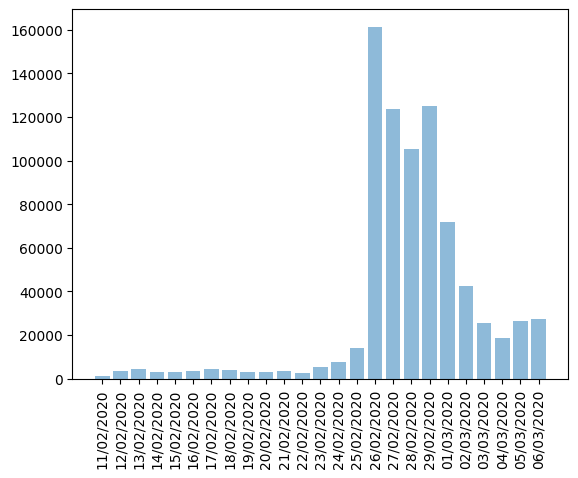

In [99]:
y_pos = np.arange(len(aux1))
performance = aux2

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, aux1)
#plt.ylabel('Usage')
#plt.title('Programming language usage')
plt.xticks(rotation=90)
plt.show()

In [89]:
df = pd.DataFrame( [[ij for ij in i] for i in tweetsData] )
df.rename(columns={0: 'Data', 1: 'Quantidade'}, inplace=True);

In [95]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly

In [96]:
data = [go.Bar(x=df.Data, y=df.Quantidade)]
plotly.offline.iplot(data, filename='jupyter-basic_bar')

In [39]:
query("select * from tabela")

[(93,
  'Twitter Saúde: Todos',
  "select to_char(datatweet, 'YYYY/MM') as data, count(id) as quantidade from tweet\nwhere codprojeto = 17\ngroup by 1\norder by 1",
  datetime.datetime(2019, 7, 3, 12, 38, 25),
  [{'data': '2014/11', 'quantidade': '186933'},
   {'data': '2014/12', 'quantidade': '1265092'},
   {'data': '2015/01', 'quantidade': '2402759'},
   {'data': '2015/02', 'quantidade': '2350918'},
   {'data': '2015/03', 'quantidade': '2522033'},
   {'data': '2015/04', 'quantidade': '2414563'},
   {'data': '2015/05', 'quantidade': '2650653'},
   {'data': '2015/06', 'quantidade': '2511330'},
   {'data': '2015/07', 'quantidade': '2616220'},
   {'data': '2015/08', 'quantidade': '2458911'},
   {'data': '2015/09', 'quantidade': '2403663'},
   {'data': '2015/10', 'quantidade': '2374881'},
   {'data': '2015/11', 'quantidade': '2486269'},
   {'data': '2015/12', 'quantidade': '2376322'},
   {'data': '2016/01', 'quantidade': '2456086'},
   {'data': '2016/02', 'quantidade': '2585899'},
   {'da